### Transformation

Do variable distribution affect the outcome of the model ?
The answer is it depends on what kind of model are you using.
For tree based models (Random Forest, XGBoost), Neural Networks or even for Support Vector machine the distribution of variable does not affect the outcome of the model but if you are choosing model Like Liner Regression or Logistic regression the variable distribution can play a vital part because one the assumptions in these models is the distribution of variable should follow a Gaussian Distribution(Bell Curve).
What if the variable does not follow Gaussian distribution, then we can transform them to follow a Gaussian distribution by following methods?
1.	Logarithmic Transformation: It only takes the log of the variable, just remember to add 0 because log(0) is indeterminable.
2.	Reciprocal transformation: We just need to take the reciprocal(1/variable) of the variable same as LT we need to add 1 for obvious reasons.
3.	Square Root Transformation: Just raise the variable to the power 0.5.
4.	Exponential Transformation: Just raise the variable to the power 0.2
5.	BoxCox Transformation: Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [3]:
data=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [5]:

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [6]:
data['Age']=impute_na(data,'Age')

In [8]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Q-Q plot

In [9]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    


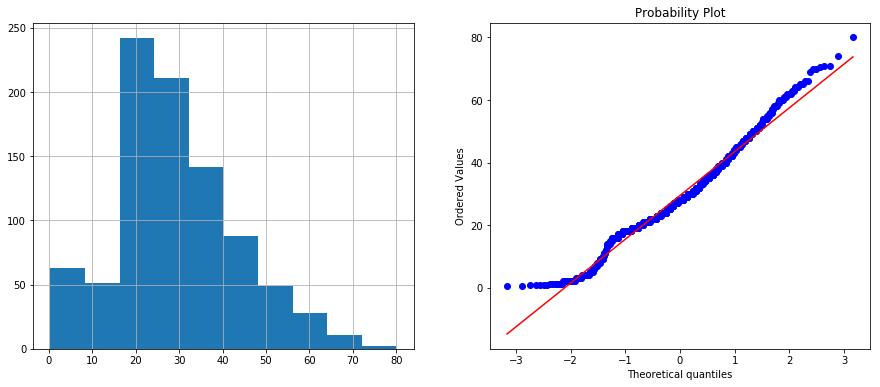

In [10]:
diagnostic_plots(data, 'Age')

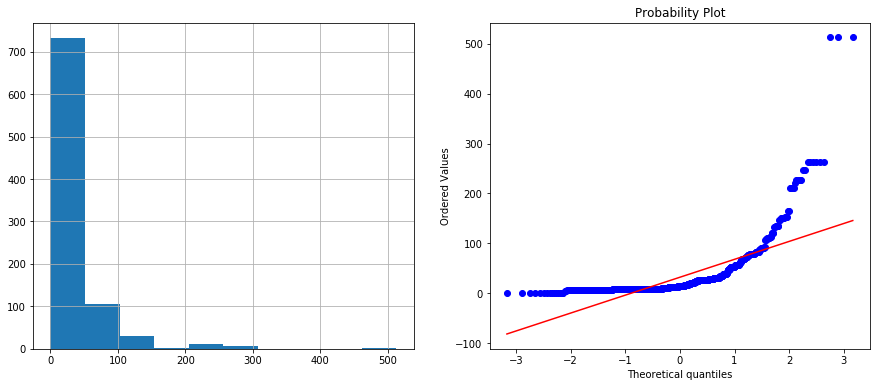

In [21]:
diagnostic_plots(data, 'Fare')

### Logarithmic Transformation

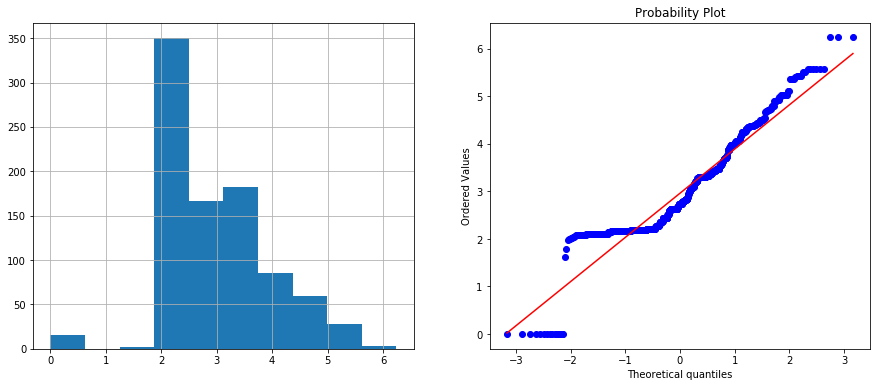

In [22]:
#adding +1 beacsue if there is some value which has Zero Value he log(0) will undetrminable 
data['Log_Fare']=np.log(data['Fare']+1)
diagnostic_plots(data,'Log_Fare')

The logarithmic distribution does a good job in making Fare variable look Gaussian Distributed

### Reciprocal transformation

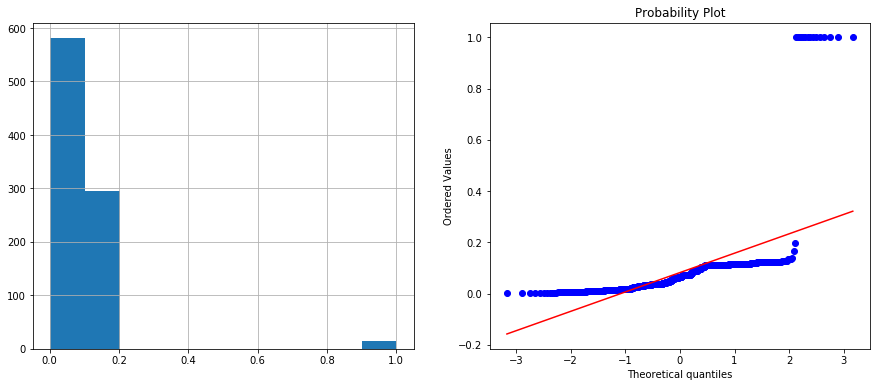

In [24]:
#adding zero because if there is some value whch have zero value then 1/0 will be infinite
data['Rec_Fare']=1/(data['Fare']+1)
diagnostic_plots(data,'Rec_Fare')

### Sqaure Root Tansformation

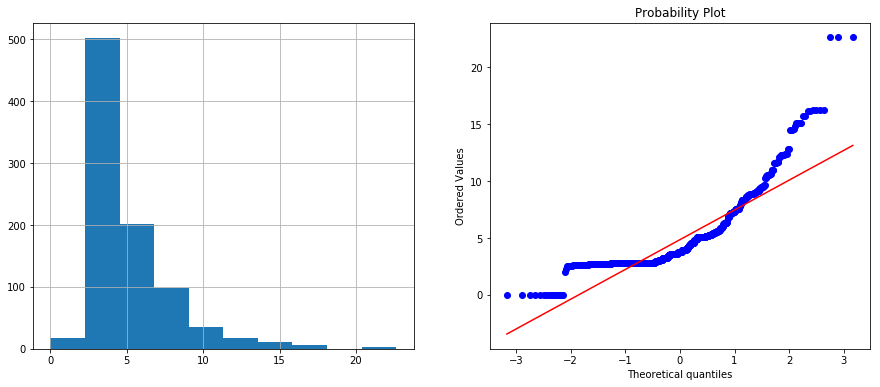

In [25]:
data['sqr_Fare']=data['Fare']**(1/2)
diagnostic_plots(data,'sqr_Fare')

### Exponential Tanformation

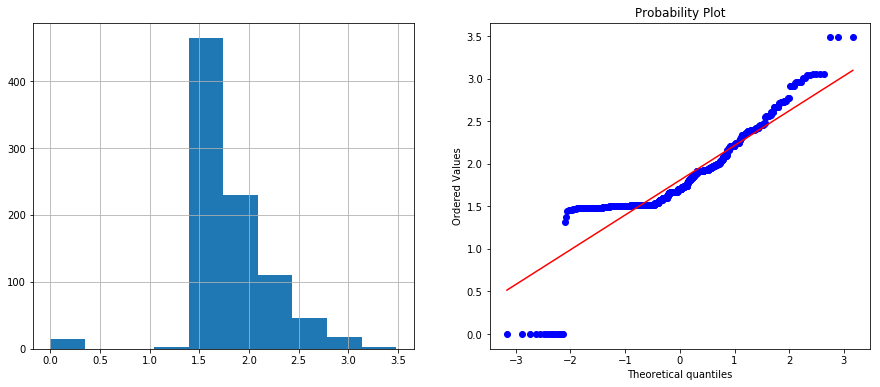

In [11]:
data['Exp_Fare']=data['Fare']**(1/5)
diagnostic_plots(data,'Exp_Fare')

## BoxCox

Optimal lambda:  -0.09778702893845798


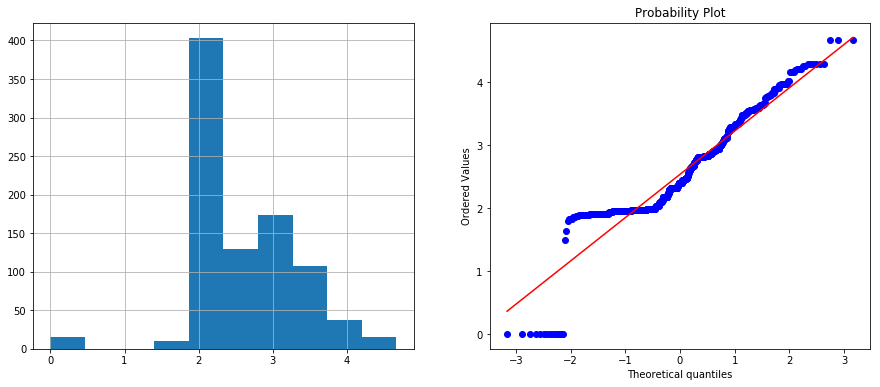

In [27]:
data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_boxcox')